## HW6-1
#### Windy Gridworld Example (w/ SARSA)

#### 1. Initializing

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mlc

# hparams
ALPHA = 0.5
GAMMA = 1 # undiscounted
EPSILON = 0.1
ROW = 7
COL = 10
M = 4
ACTIONS = ["right", "down", "up", "left"]
WINDS = [0, 0 ,0, 1 ,1 ,1, 2, 2, 1, 0]

START = (3, 0)
GOAL = (3, 7)
Q = np.zeros((ROW, COL, M))

NUM_TRAIN = 20
NUM_EPISODE = 50

#### 2. Functions

In [2]:
def argmax_q(i, j):
  _argmax = 0
  q_value = Q[i][j][_argmax]
  for a in range(M):
    if Q[i][j][a] > q_value:
      _argmax = a
      q_value = Q[i][j][a]
  return _argmax

def epsilon_greedy(S, eps):
  if np.random.choice([True, False], p=[eps, 1 - eps]):
    return np.random.choice([0, 1, 2, 3])
  else:
    return argmax_q(S[0], S[1])

def move(cur_pos, action):
  
  def apply_wind(xx, yy, y):
    return xx - WINDS[y], yy
  
  def bound_check(r, c):
    if r < 0: r = 0
    if ROW - 1 < r: r = ROW - 1
    if c < 0: c = 0
    if COL - 1 < c: c = COL - 1
    return r, c

  x, y = cur_pos
  if action == 0:
    n_x, n_y = apply_wind(x, y + 1, y)
  elif action == 1:
    n_x, n_y = apply_wind(x + 1, y, y)
  elif action == 2:
    n_x, n_y = apply_wind(x - 1, y, y)
  elif action == 3:
    n_x, n_y = apply_wind(x, y - 1, y)
  
  return bound_check(n_x, n_y)

#### 3. Define model

In [3]:
def train():
  step = 1
  plot_data = []
  start = time.time()
  for ep in range(NUM_EPISODE): # loop for each episode
    S = START # initialize S
    A = epsilon_greedy(S, EPSILON)  # Choose A from S using epsilon_greedy 
    while True: # loop for each step of episode
      if S == GOAL: # if S is terminal, break
        break
      S_prime = move(S, A)  # take action A, observe S'
      R = -1 # observe R
      A_prime = epsilon_greedy(S_prime, EPSILON)  # choose A' from S' using epsilon_greedy
      Q[S[0]][S[1]][A] = Q[S[0]][S[1]][A] + ALPHA * (R + GAMMA * Q[S_prime[0]][S_prime[1]][A_prime] - Q[S[0]][S[1]][A])
      S, A = S_prime, A_prime
      step += 1
      plot_data.append(ep + 1)
    # print(f"episode: {ep + 1}, step: {step}")

  print(f"total time steps: {step}, ELAP: {time.time() - start:.5f}")
  plt.plot(plot_data)
  plt.xlabel("time steps")
  plt.ylabel("episodes")
  plt.show()

def test():
  print("\n Test Result:")
  S = START
  A = argmax_q(S[0], S[1])
  path = [S]
  aa = [ACTIONS[A]]
  step = 0
  FAIL = False
  while True:
    if S == GOAL:
      break
    if step > 50:
      FAIL = True
      break
    S_prime = move(S, A)
    A_prime = argmax_q(S[0], S[1])
    S = S_prime
    A = A_prime
    aa.append(ACTIONS[A])
    path.append(S)
    step += 1

  if FAIL:
    print("Not Converge")
  else:
    print(f"Greedy exploration episode step: {len(aa) - 1}")

    # show figure
    img = np.zeros((ROW, COL), dtype=float)
    for i, s in enumerate(path):
      img[s[0], s[1]] = 0.05 * (i + 1)
    figure, ax = plt.subplots()
    color_map = mlc.LinearSegmentedColormap.from_list("ColorMap", [(1.0, 1.0, 1.0), (0, 0, 0)])
    ax.imshow(img, cmap=color_map)
    ax.axes.yaxis.set_visible(False)
    ax.set_xticks(np.arange(0, len(WINDS), 1))
    ax.set_xticklabels(WINDS)
    plt.show()

    print(" -> ".join([str(x) for x in path]))
    print("action:", aa[:-1])

#### 4. Run & Results

*** train: 1, num_episodes: 50***
total time steps: 4767, ELAP: 0.26266


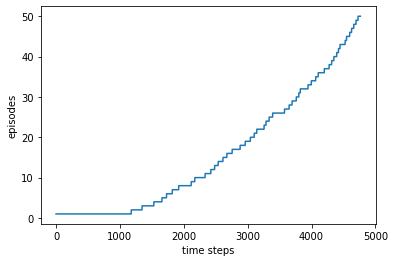


 Test Result:
Not Converge



*** train: 2, num_episodes: 60***
total time steps: 4994, ELAP: 0.28209


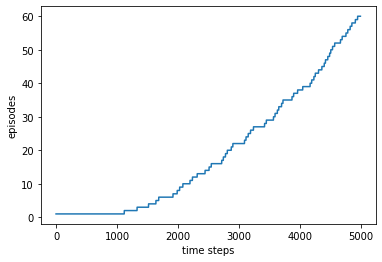


 Test Result:
Not Converge



*** train: 3, num_episodes: 70***
total time steps: 5630, ELAP: 0.42710


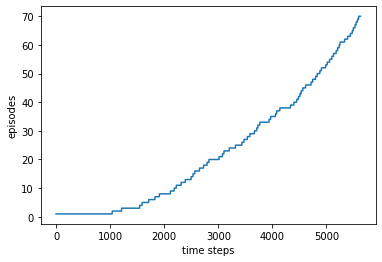


 Test Result:
Not Converge



*** train: 4, num_episodes: 80***
total time steps: 5879, ELAP: 0.31211


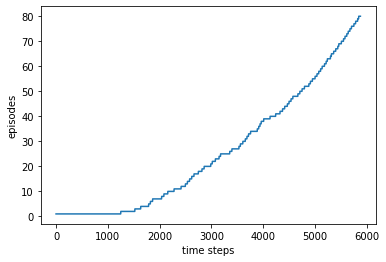


 Test Result:
Not Converge



*** train: 5, num_episodes: 90***
total time steps: 6185, ELAP: 0.42861


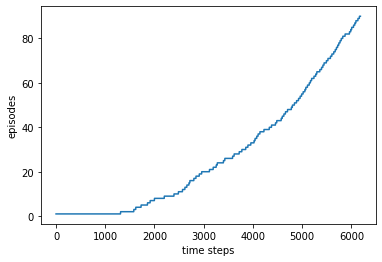


 Test Result:
Not Converge



*** train: 6, num_episodes: 100***
total time steps: 6479, ELAP: 0.31668


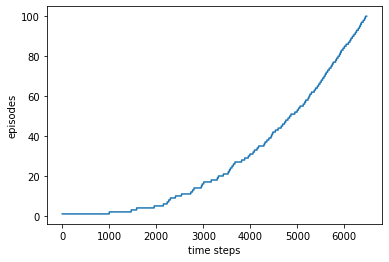


 Test Result:
Not Converge



*** train: 7, num_episodes: 110***
total time steps: 6640, ELAP: 0.47898


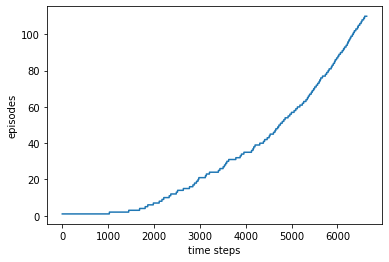


 Test Result:
Not Converge



*** train: 8, num_episodes: 120***
total time steps: 7092, ELAP: 0.46869


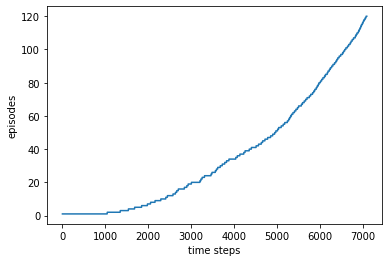


 Test Result:
Not Converge



*** train: 9, num_episodes: 130***
total time steps: 7166, ELAP: 0.41585


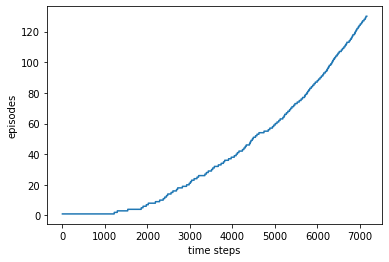


 Test Result:
Not Converge



*** train: 10, num_episodes: 140***
total time steps: 7740, ELAP: 0.57084


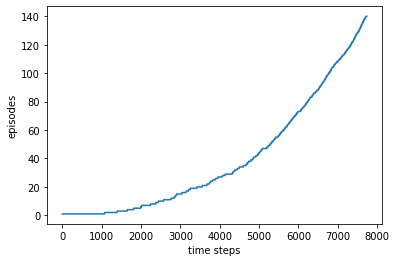


 Test Result:
Greedy exploration episode step: 20


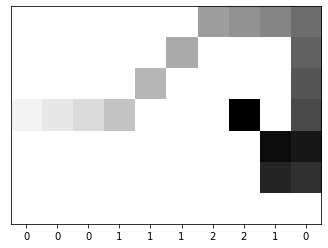

(3, 0) -> (3, 1) -> (3, 2) -> (3, 3) -> (3, 3) -> (2, 4) -> (1, 5) -> (0, 6) -> (0, 7) -> (0, 8) -> (0, 9) -> (0, 9) -> (1, 9) -> (2, 9) -> (3, 9) -> (4, 9) -> (5, 9) -> (5, 8) -> (4, 9) -> (4, 8) -> (3, 7)
action: ['right', 'right', 'right', 'down', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'down', 'down', 'down', 'down', 'down', 'left', 'right', 'left', 'left']



*** train: 11, num_episodes: 150***
total time steps: 7772, ELAP: 0.40952


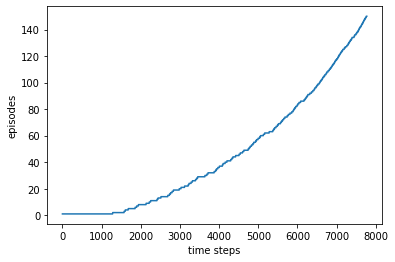


 Test Result:
Not Converge



*** train: 12, num_episodes: 160***
total time steps: 8497, ELAP: 0.48227


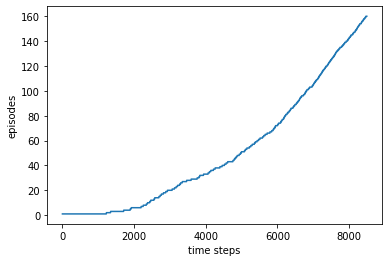


 Test Result:
Not Converge



*** train: 13, num_episodes: 170***
total time steps: 8002, ELAP: 0.51511


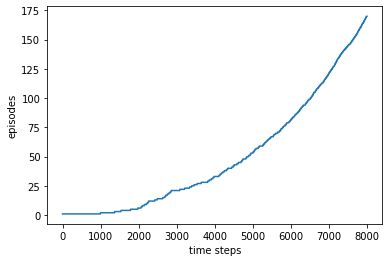


 Test Result:
Not Converge



*** train: 14, num_episodes: 180***
total time steps: 8317, ELAP: 0.43636


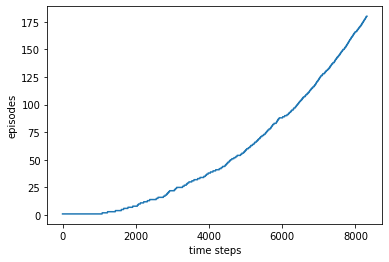


 Test Result:
Not Converge



*** train: 15, num_episodes: 190***
total time steps: 8711, ELAP: 0.38447


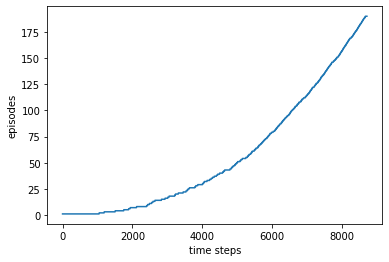


 Test Result:
Not Converge



*** train: 16, num_episodes: 200***
total time steps: 8991, ELAP: 0.46778


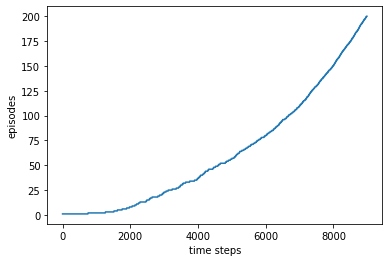


 Test Result:
Not Converge



*** train: 17, num_episodes: 210***
total time steps: 8843, ELAP: 0.36324


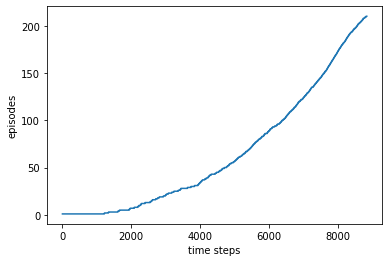


 Test Result:
Not Converge



*** train: 18, num_episodes: 220***
total time steps: 9116, ELAP: 0.49679


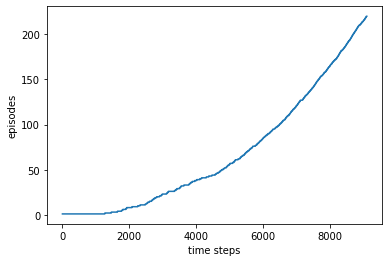


 Test Result:
Greedy exploration episode step: 20


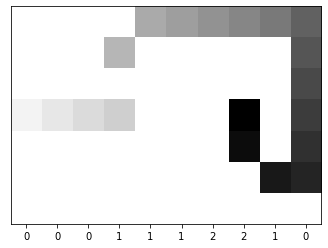

(3, 0) -> (3, 1) -> (3, 2) -> (3, 3) -> (1, 3) -> (1, 3) -> (0, 4) -> (0, 5) -> (0, 6) -> (0, 7) -> (0, 8) -> (0, 9) -> (0, 9) -> (1, 9) -> (2, 9) -> (3, 9) -> (4, 9) -> (5, 9) -> (5, 8) -> (4, 7) -> (3, 7)
action: ['right', 'right', 'right', 'up', 'down', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'down', 'down', 'down', 'down', 'down', 'left', 'left', 'down']



*** train: 19, num_episodes: 230***
total time steps: 9591, ELAP: 0.46620


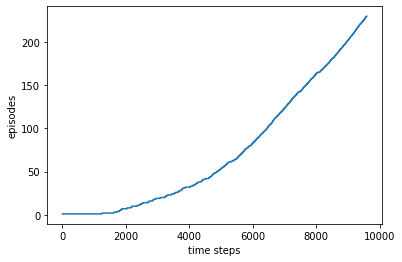


 Test Result:
Not Converge



*** train: 20, num_episodes: 240***
total time steps: 9595, ELAP: 0.65173


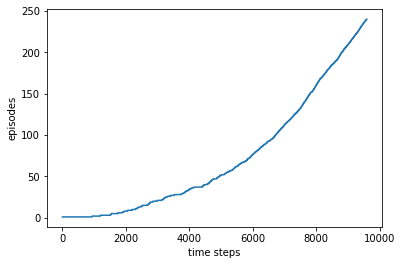


 Test Result:
Not Converge





In [4]:
for i in range(NUM_TRAIN):
  print(f"*** train: {i + 1}, num_episodes: {NUM_EPISODE}***")
  Q = np.zeros((ROW, COL, M))
  train()
  test()
  NUM_EPISODE += 10
  print("\n\n")

#### 5. Discussion
실험은 학습시키는 episode를 50 ~ 240 까지 증가시켜가며 실험
1. Episodes/Time steps 그래프를 살펴보자  
초반에는 각 episode의 step이 많았지만, 학습이 될수록 점점 step이 일정해지는 것을 볼 수 있다.  
따라서 학습이 잘 진행되는 것을 확인할 수 있다.
2. 하지만 최종 결과로 test를 진행해보면 생각보다 수렴하지 않는 경우가 많은 것을 확인할 수 있다.
  - step이 50회 이상으로 진행되면 수렴하지 않은 것으로 간주
  - 수렴하지 않는 경우의 state 변화를 출력해보니 final state에 도달하지 못하고 cycle에 빠지는 경우가 발생
3. 학습 시간은 매우매우 빠르다.